In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

url = "https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv"
df = pd.read_csv(url)

print(df.columns.tolist())
df.head()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
print("Dimensions :", df.shape)
print(df.head())

Dimensions : (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
print(df.info())
print(df.describe())
print("Valeurs manquantes :\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [11]:
df.rename(columns={
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


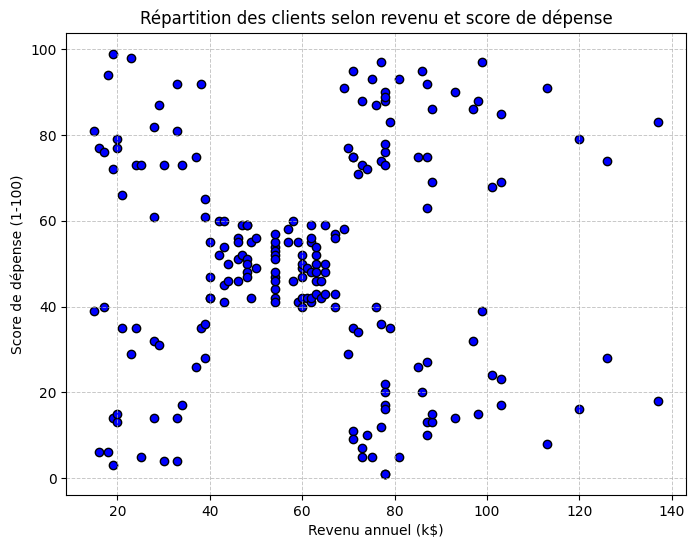

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], color='blue', edgecolors='black')

plt.title('Répartition des clients selon revenu et score de dépense')
plt.xlabel('Revenu annuel (k$)')
plt.ylabel('Score de dépense (1-100)')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()


In [13]:
X = df.loc[:, ["AnnualIncome", "SpendingScore"]].values
print("Aperçu de X :\n", X[:5])

Aperçu de X :
 [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


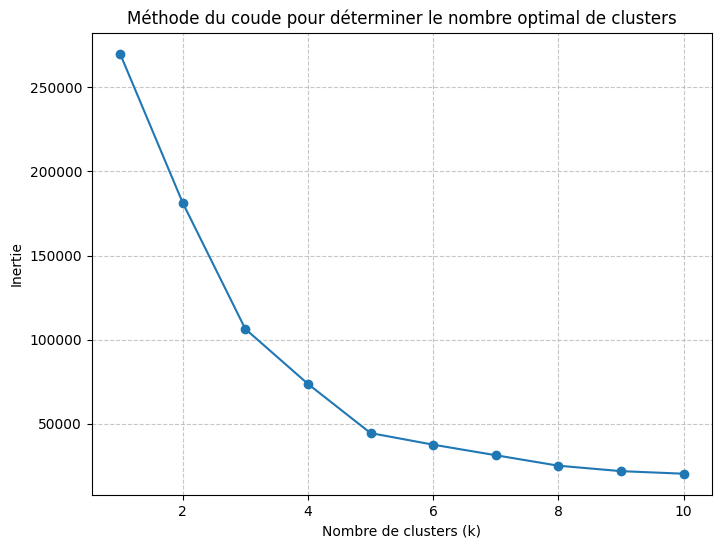

In [14]:
X = df.loc[:, ["AnnualIncome", "SpendingScore"]].values

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertias, marker='o')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [16]:
print("Effectifs par cluster :")
print(df['Cluster'].value_counts().sort_index())

print("\nMoyennes par cluster :")
print(df.groupby('Cluster')[['AnnualIncome', 'SpendingScore']].mean())


Effectifs par cluster :
Cluster
0    23
1    22
2    35
3    39
4    81
Name: count, dtype: int64

Moyennes par cluster :
         AnnualIncome  SpendingScore
Cluster                             
0           26.304348      20.913043
1           25.727273      79.363636
2           88.200000      17.114286
3           86.538462      82.128205
4           55.296296      49.518519


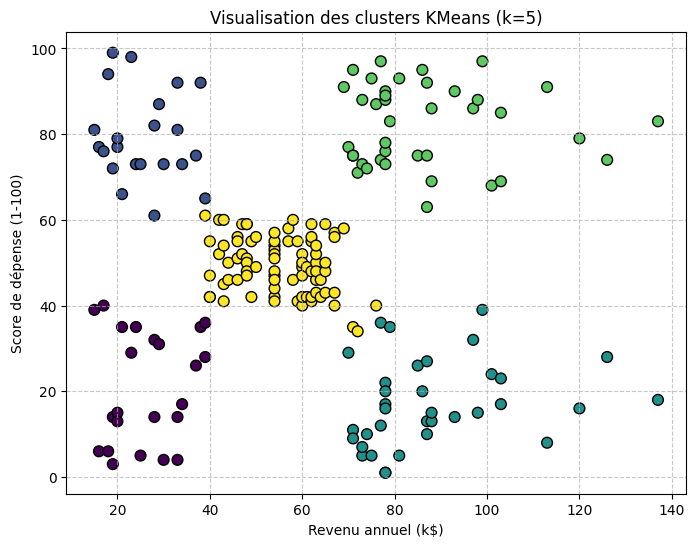

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'],
            c=df['Cluster'], cmap='viridis', s=60, edgecolors='black')
plt.title("Visualisation des clusters KMeans (k=5)")
plt.xlabel("Revenu annuel (k$)")
plt.ylabel("Score de dépense (1-100)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
